['-3.48%' '-1.08%' '4.10%' '0.22%' '1.52%' '2.09%' '-6.39%' '1.25%'
 '-2.30%' '-1.97%' '2.16%' '-0.93%' '-2.09%' '4.06%' '4.71%' '-2.66%'
 '3.21%' '-5.48%' '-6.41%' '3.35%' '-4.28%' '5.42%' '2.90%' '6.07%'
 '1.64%' '2.89%' '-1.89%' '-0.31%' '-0.08%' '0.71%' '2.02%' '0.65%'
 '-1.52%' '2.88%' '5.65%' '0.17%' '-0.86%' '-0.60%' '-3.08%' '0.50%'
 '-3.00%' '4.58%' '0.51%' '1.21%']
['-1.15%' '-0.66%' '-0.27%' '-0.17%' '0.22%' '-0.35%' '-2.30%' '-1.16%'
 '-0.80%' '0.05%' '0.82%' '-0.33%' '0.09%' '1.36%' '0.42%' '0.05%'
 '-0.54%' '-0.78%' '-0.42%' '0.14%' '-0.31%' '0.97%' '-1.86%' '-0.05%'
 '0.61%' '-0.59%' '-0.46%' '0.45%' '0.05%' '-0.02%' '-0.15%' '1.60%'
 '-0.54%' '0.32%' '0.31%' '1.19%' '0.80%' '-0.71%' '-2.26%' '0.21%'
 '-0.89%' '0.21%' '-0.05%' '0.83%']
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.216
Model:                            OLS   Adj. R-squared:                  0.188
Me

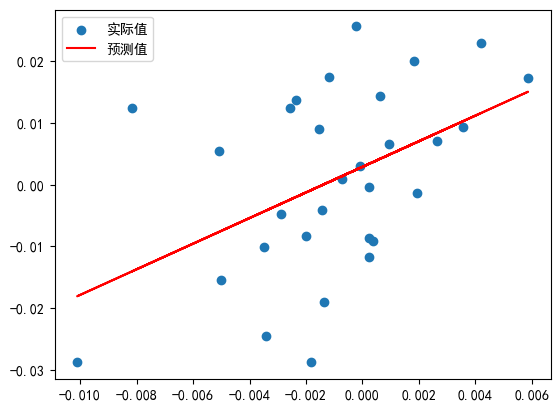

In [4]:

import statsmodels.api as sm
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import leastsq


total_day = 34
train_day = 30
test_day = 4


stock_return = np.loadtxt("601666.csv", dtype=str, delimiter='"', skiprows=1, usecols=(13))
index_return = np.loadtxt("index.csv", dtype=str, delimiter='"', skiprows=1, usecols=(13))

print(stock_return)
print(index_return)

cut_stock = []
cut_index = []
for i in range(total_day):
    cut_stock.append(float(stock_return[i][:-1]) / 100)
    cut_index.append(float(index_return[i][:-1]) / 100)

stock_log = np.log10(np.array(cut_stock) + 1)
index_log = np.log10(np.array(cut_index) + 1)

y = stock_log[:30]
x = sm.add_constant(index_log[:30]) # 若模型中有截距，必须有这一步
model = sm.OLS(y, x).fit() # 构建最小二乘模型并拟合
print(model.summary()) # 输出回归结果
print(type(model.summary()))

# 画图
# 这两行代码在画图时添加中文必须用
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

predicts = model.predict() # 模型的预测值
x = index_log[:30] # 自变量为第 3 列数据
plt.scatter(x, y, label='实际值') # 散点图
plt.plot(x, predicts, color = 'red', label='预测值')
plt.legend() # 显示图例，即每条线对应 label 中的内容
plt.show() # 显示图形
